In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import pydicom
from calc_porosity import calc_porosity

## 空隙率を算出

<timed exec>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
<timed exec>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
<timed exec>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


CPU times: user 20.7 s, sys: 1.45 s, total: 22.1 s
Wall time: 23.1 s


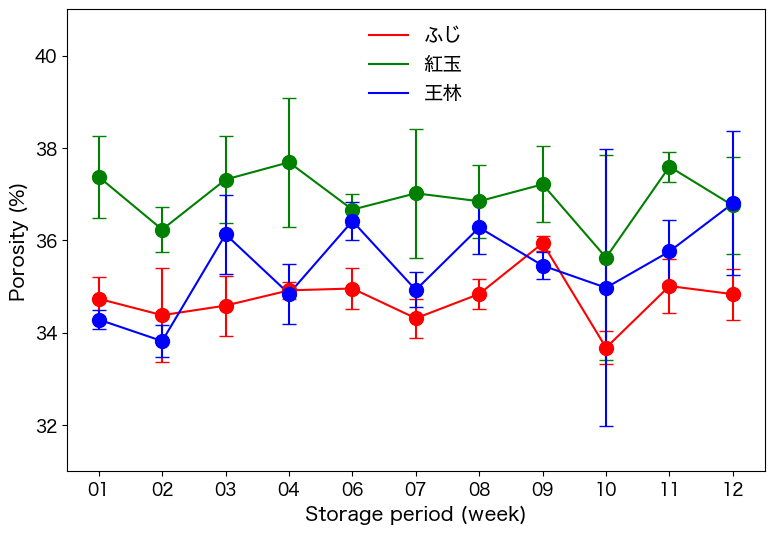

In [2]:
%%time
res_fuji = calc_porosity(cultivar='Fuji')
res_kougyoku = calc_porosity(cultivar='Kougyoku')
res_ourin = calc_porosity(cultivar='Ourin')


# マージンを設定
margin = 0.2  #0 <margin< 1
totoal_width = 1 - margin
labels = ['01','02','03','04','06','07','08','09','10','11','12']

# 棒グラフをプロット
fig = plt.figure(figsize=(9,6))
for i, label in enumerate(labels):

    plt.errorbar(label, res_fuji.mean()[i], yerr =res_fuji.std()[i], fmt='o', capsize=5, markersize=10, ecolor='r', markeredgecolor = "r", color='r')
    plt.errorbar(label, res_kougyoku.mean()[i], yerr =res_kougyoku.std()[i], capsize=5, fmt='o', markersize=10, ecolor='g', markeredgecolor = "g", color='g')
    plt.errorbar(label, res_ourin.mean()[i], yerr =res_ourin.std()[i], capsize=5, fmt='o', markersize=10, ecolor='b', markeredgecolor = "b", color='b')

plt.plot(labels, res_fuji.mean(),c='r',label='ふじ')
plt.plot(labels, res_kougyoku.mean(),c='g',label='紅玉')
plt.plot(labels, res_ourin.mean(),c='b',label='王林')

# ラベルの設定
plt.xticks(labels,fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(31,41)
plt.xlabel('Storage period (week)',fontsize=14)
plt.ylabel('Porosity (%)',fontsize=14)
plt.legend(loc='upper center',fontsize=14, frameon=False)

fig.savefig(f'./../output/図30_compare_porosity.png',dpi=400)

## 力学的特性との相関係数を算出

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

column_list = ['firmness_skin','firmness_flesh_only','CI_flesh_only']
column = column_list[2]

# 特徴量を抽出
df = pd.read_csv('./../data/texture_all.csv',header=0,index_col=0)

# 品種のカラムを作成
func = lambda x:x[:-7]
temp = pd.DataFrame(df.index, 
                    columns = ['cultivar'],
                    index = df.index).applymap(func)

df['cultivar'] = temp

# 貯蔵期間のカラムを作成
func = lambda x:x[-6:][0:2]
temp = pd.DataFrame(df.index, 
                    columns = ['period'],
                    index = df.index).applymap(func)


df['period'] = temp

# ヒストグラムを作成

# 各品種・貯蔵期間ごとの平均値・標準偏差をdfに格納
df_mean = df.groupby(['cultivar','period']).mean()
df_std = df.groupby(['cultivar','period']).std()

# 品種ごとのCIの平均値・標準偏差を算出
df_mean_fuji = df_mean.loc[[('Fuji')],:][column].values
df_mean_kougyoku = df_mean.loc[[('Kougyoku')],:][column].values
df_mean_ourin = df_mean.loc[[('Ourin')],:][column].values

df_std_fuji = df_std.loc[[('Fuji')],:][column].values
df_std_kougyoku = df_std.loc[[('Kougyoku')],:][column].values
df_std_ourin = df_std.loc[[('Ourin')],:][column].values

print(np.corrcoef([res_fuji.mean().values, df_mean_fuji])[0][1])
print(np.corrcoef([res_kougyoku.mean().values, df_mean_kougyoku])[0][1])
print(np.corrcoef([res_ourin.mean().values, df_mean_ourin])[0][1])

0.2217901679272283
0.4420633039041902
-0.515493002728122


/var/folders/19/rctt2t_j609blszmcrd_zd4r0000gn/T/ipykernel_83813/3171044059.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  index = df.index).applymap(func)
/var/folders/19/rctt2t_j609blszmcrd_zd4r0000gn/T/ipykernel_83813/3171044059.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  index = df.index).applymap(func)
